In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
DATA_FOLDER_PATH = os.getcwd() + '/../data/KS VERI/CHILLER/'

In [3]:
FILE_NAMES = ['CHILLER 1 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx',
              'CHILLER 2 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx',
              'CHILLER 3 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx',
              'CHILLER 1 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx',
              'CHILLER 2 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx',
              'CHILLER 3 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx']

In [4]:
PATHS = [DATA_FOLDER_PATH + file_name for file_name in FILE_NAMES]

In [5]:
START_TIME = pd.to_datetime('2022-01-01 00:00:00')
END_TIME = pd.to_datetime('2023-12-31 23:55:00')
TIMESTAMPS = [time for time in pd.date_range(START_TIME, END_TIME, freq='5min')]
len(TIMESTAMPS)

210240

In [6]:
ALL_DF = []
for i in range(len(PATHS)):
    print(PATHS[i])
    DF = pd.read_excel(PATHS[i], sheet_name='Sheet2', skiprows=7, usecols='A:C')
    DF = DF[:-1]

    # change timestamp data to datetime format
    TIMESTAMPS = DF['Timestamp'].tolist()

    # the format of the timestamp is '3/1/2022 9:45 PM', we need to convert it to datetime format to be able to use it
    NEW_TIMESTAMPS = []
    DROP_INDEXES = []
    for j in range(len(TIMESTAMPS)):
        timestamp = TIMESTAMPS[j]
        if isinstance(timestamp, float):
            print(j, timestamp)
            DROP_INDEXES.append(j)
            continue
        
        NEW_TIMESTAMPS.append(pd.to_datetime(timestamp))
        
    DF = DF.drop(DROP_INDEXES)
    
    DF['Timestamp'] = pd.to_datetime(NEW_TIMESTAMPS)
    DF.reset_index(drop=True, inplace=True)
    
    ALL_DF.append(DF)

/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 1 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx
86237 nan
86238 nan
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 2 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx
86240 nan
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 3 GIRIS-CIKIS SU SICAKLIĞI 2023 YILI.xlsx
86243 nan
86244 nan
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 1 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx
87486 nan
87487 nan
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 2 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xlsx
87487 nan
87488 nan
/Users/smartopt/Desktop/Bora/Courses/11_Fall'23/INDR 491/code/INDR491/jupyter/../data/KS VERI/CHILLER/CHILLER 3 GIRIS-CIKIS SU SICAKLIĞI 2022 YILI.xls

In [7]:
# concat 0 with 3, 1 with 4, 2 with 5
MERGED_DF_LIST = [pd.concat([ALL_DF[0], ALL_DF[3]], axis=0), 
                  pd.concat([ALL_DF[1], ALL_DF[4]], axis=0),
                  pd.concat([ALL_DF[2], ALL_DF[5]], axis=0)]

for i in range(len(MERGED_DF_LIST)):
    MERGED_DF_LIST[i].reset_index(drop=True, inplace=True)
    MERGED_DF_LIST[i].sort_values(by='Timestamp', inplace=True)
    
    TIMESTAMPS = MERGED_DF_LIST[i]['Timestamp'].tolist()
    MERGED_DF_LIST[i]['Timestamp'] = pd.to_datetime(TIMESTAMPS)
    
    MERGED_DF_LIST[i].reset_index(drop=True, inplace=True)

In [8]:
MERGED_DF_LIST[0]

,Timestamp,KS.KS_PLC\nCH1_CIKIS_SIC,KS.KS_PLC\nCH1_GIRIS_SIC
0,2022-03-01 21:45:00,14.400000,15.000000
1,2022-03-01 21:50:00,14.400000,15.000000
2,2022-03-01 21:55:00,14.400000,15.000000
3,2022-03-01 22:00:00,14.400000,15.000000
4,2022-03-01 22:05:00,14.400000,15.000000
...,...,...,...
173718,2023-11-01 21:50:00,16.500000,18.299999
173719,2023-11-01 21:55:00,16.799999,18.299999
173720,2023-11-01 22:00:00,16.500000,18.000000
173721,2023-11-01 22:05:00,16.200001,18.000000


In [9]:
# merge dataframes into one dataframe based on the timestamp
# if there is no data for a timestamp, fill it with nan
FINAL_DF = pd.DataFrame({'Timestamp':TIMESTAMPS})

# merge dataframes
for i in range(len(MERGED_DF_LIST)):
    FINAL_DF = FINAL_DF.merge(MERGED_DF_LIST[i], on='Timestamp', how='left')

# drop rows with all nan values after first column
FINAL_DF.dropna(axis=0, how='all', subset=FINAL_DF.columns[1:], inplace=True)

FINAL_DF

,Timestamp,KS.KS_PLC\nCH1_CIKIS_SIC,KS.KS_PLC\nCH1_GIRIS_SIC,KS.KS_PLC\nCH2_CIKIS_SIC,KS.KS_PLC\nCH2_GIRIS_SIC,KS.KS_PLC\nCH3_CIKIS_SIC,KS.KS_PLC\nCH3_GIRIS_SIC
0,2022-03-01 21:45:00,14.4,15.0,14.300000,14.800000,15.400000,15.900000
1,2022-03-01 21:50:00,14.4,15.0,14.300000,14.500000,15.400000,15.900000
2,2022-03-01 21:55:00,14.4,15.0,14.300000,14.500000,15.400000,15.900000
3,2022-03-01 22:00:00,14.4,15.0,14.300000,14.500000,15.400000,15.900000
4,2022-03-01 22:05:00,14.4,15.0,14.300000,14.500000,15.400000,15.900000
...,...,...,...,...,...,...,...
173724,2023-11-01 22:10:00,16.5,18.0,94.800003,96.900002,17.900000,18.200001
173725,2023-11-01 22:15:00,NaN,NaN,94.800003,96.900002,18.200001,18.500000
173726,2023-11-01 22:20:00,NaN,NaN,94.800003,96.900002,18.200001,18.500000
173728,2023-11-01 22:30:00,NaN,NaN,NaN,NaN,17.299999,17.900000


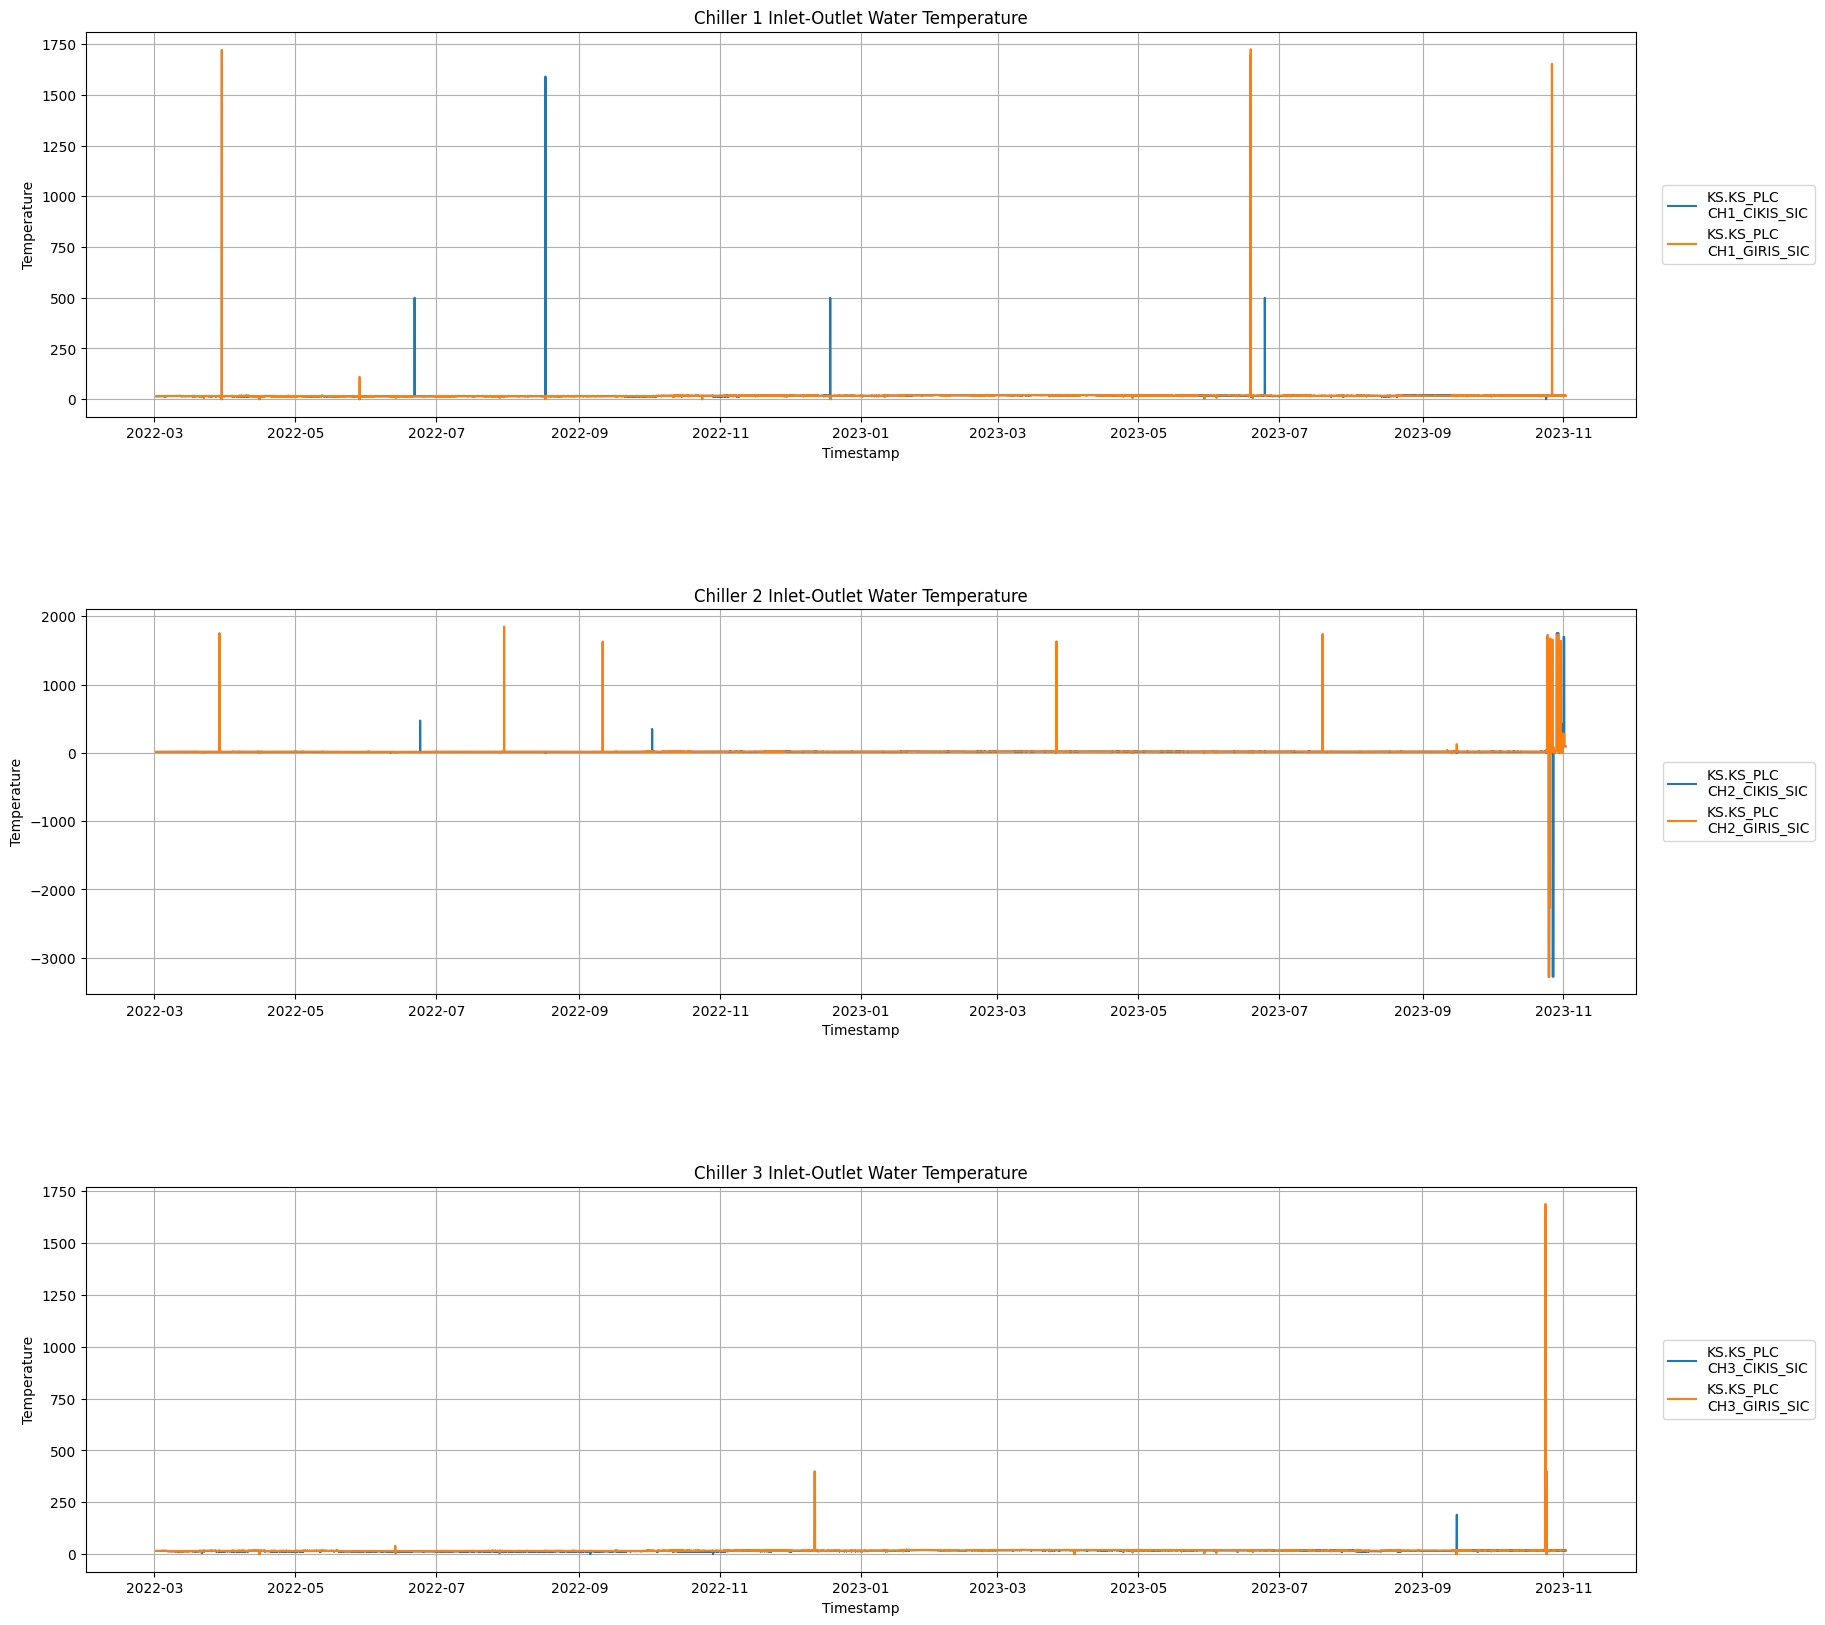

In [10]:
figure, axis = plt.subplots(3, 1, figsize=(20, 20))

# put some space between subplots
figure.subplots_adjust(hspace=0.5)

# put legend outside the plot area to the right of the plot

axis[0].plot(FINAL_DF['Timestamp'], 
             FINAL_DF[FINAL_DF.columns[1:3]],
             label=FINAL_DF.columns[1:3])
axis[0].set_xlabel('Timestamp')
axis[0].set_ylabel('Temperature')
axis[0].set_title('Chiller 1 Inlet-Outlet Water Temperature')
axis[0].grid(True)
axis[0].legend(loc='center right',bbox_to_anchor=(1.12, 0.5))

axis[1].plot(FINAL_DF['Timestamp'],
             FINAL_DF[FINAL_DF.columns[3:5]],
             label=FINAL_DF.columns[3:5])
axis[1].set_xlabel('Timestamp')
axis[1].set_ylabel('Temperature')
axis[1].set_title('Chiller 2 Inlet-Outlet Water Temperature')
axis[1].grid(True)
axis[1].legend(loc='center right',bbox_to_anchor=(1.12, 0.5))

axis[2].plot(FINAL_DF['Timestamp'],
             FINAL_DF[FINAL_DF.columns[5:]],
             label=FINAL_DF.columns[5:])
axis[2].set_xlabel('Timestamp')
axis[2].set_ylabel('Temperature')
axis[2].set_title('Chiller 3 Inlet-Outlet Water Temperature')
axis[2].grid(True)
axis[2].legend(loc='center right',bbox_to_anchor=(1.12, 0.5))

plt.show()

In [11]:
# save dataframe to csv file
FINAL_DF.to_csv(os.getcwd() + '/../data/KS VERI/CLEAN_DATA/CHILLER.csv', index=False)